In [1]:
# Import packages
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import socket 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
%load_ext dotenv
%dotenv ../../.env

In [3]:
con = create_engine(os.getenv('EDM_DATA'))

In [4]:
# Specify latest PLUTO version
pluto = 'dcp_pluto."19v2_w_corrections"'
# Specify previous PLUTO version or the one you want to compare to
plutoprev = 'dcp_pluto."19v1"'
condition = ''

In [5]:
sql = '''
SELECT
    count(*) as total,
    count(nullif(a.borough = b.borough, true)) as borough,
    count(nullif(a.block = b.block, true)) as block,
    count(nullif(a.lot = b.lot, true)) as lot,
    count(nullif(a.cd = b.cd, true)) as cd,
    count(nullif(a.ct2010 = b.ct2010, true)) as ct2010,
    count(nullif(a.cb2010 = b.cb2010, true)) as cb2010,
    count(nullif(a.schooldist = b.schooldist, true)) as schooldist,
    count(nullif(a.council = b.council, true)) as council,
    count(nullif(a.zipcode = b.zipcode, true)) as zipcode,
    count(nullif(a.firecomp = b.firecomp, true)) as firecomp,
    count(nullif(a.policeprct = b.policeprct, true)) as policeprct,
    count(nullif(a.healtharea = b.healtharea, true)) as healtharea,
    count(nullif(a.sanitboro = b.sanitboro, true)) as sanitboro,
    count(nullif(a.sanitsub = b.sanitsub, true)) as sanitsub,
    count(nullif(trim(a.address) = trim(b.address), true)) as address,
    
    count(nullif(a.zonedist1 = b.zonedist1, true)) as zonedist1,
    count(nullif(a.zonedist2 = b.zonedist2, true)) as zonedist2,
    count(nullif(a.zonedist3 = b.zonedist3, true)) as zonedist3,
    count(nullif(a.zonedist4 = b.zonedist4, true)) as zonedist4,
    count(nullif(a.overlay1 = b.overlay1, true)) as overlay1,
    count(nullif(a.overlay2 = b.overlay2, true)) as overlay2,
    count(nullif(a.spdist1 = b.spdist1, true)) as spdist1,
    count(nullif(a.spdist2 = b.spdist2, true)) as spdist2,
    count(nullif(a.spdist3 = b.spdist3, true)) as spdist3,
    count(nullif(a.ltdheight = b.ltdheight, true)) as ltdheight,
    count(nullif(a.splitzone = b.splitzone, true)) as splitzone,
    
    count(nullif(a.bldgclass = b.bldgclass, true)) as bldgclass,
    count(nullif(a.landuse = b.landuse, true)) as landuse,
    count(nullif(a.easements = b.easements, true)) as easements,
    count(nullif(a.ownertype = b.ownertype, true)) as ownertype,
    count(nullif(a.ownername = b.ownername, true)) as ownername,
    
    
    count(nullif(abs(a.lotarea::numeric-b.lotarea::numeric) <5, true)) as lotarea,
    count(nullif(abs(a.bldgarea::numeric-b.bldgarea::numeric) <5, true)) as bldgarea,
    count(nullif(abs(a.comarea::numeric-b.comarea::numeric) <5, true)) as comarea,
    count(nullif(abs(a.resarea::numeric-b.resarea::numeric) <5, true)) as resarea,
    count(nullif(abs(a.officearea::numeric-b.officearea::numeric) <5, true)) as officearea,
    count(nullif(abs(a.retailarea::numeric-b.retailarea::numeric) <5, true)) as retailarea,
    count(nullif(abs(a.garagearea::numeric-b.garagearea::numeric) <5, true)) as garagearea,
    count(nullif(abs(a.strgearea::numeric-b.strgearea::numeric) <5, true)) as strgearea,
    count(nullif(abs(a.factryarea::numeric-b.factryarea::numeric) <5, true)) as factryarea,
    count(nullif(abs(a.otherarea::numeric-b.otherarea::numeric) <5, true)) as otherarea,

    
    count(nullif(a.areasource = b.areasource, true)) as areasource,
    count(nullif(a.numbldgs = b.numbldgs, true)) as numbldgs,
    count(nullif(a.numfloors = b.numfloors, true)) as numfloors,
    count(nullif(a.unitsres = b.unitsres, true)) as unitsres,
    count(nullif(a.unitstotal = b.unitstotal, true)) as unitstotal,
    count(nullif(abs(a.lotfront::numeric-b.lotfront::numeric) <5, true)) as lotfront,
    count(nullif(abs(a.lotdepth::numeric-b.lotdepth::numeric) <5, true)) as lotdepth,
    count(nullif(abs(a.bldgfront::numeric-b.bldgfront::numeric) <5, true)) as bldgfront,
    count(nullif(abs(a.bldgdepth::numeric-b.bldgdepth::numeric) <5, true)) as bldgdepth,
    count(nullif(a.ext = b.ext, true)) as ext,
    count(nullif(a.proxcode = b.proxcode, true)) as proxcode,
    count(nullif(a.irrlotcode = b.irrlotcode, true)) as irrlotcode,
    count(nullif(a.lottype = b.lottype, true)) as lottype,
    count(nullif(a.bsmtcode = b.bsmtcode, true)) as bsmtcode,
    
    count(nullif(abs(a.assessland::numeric-b.assessland::numeric) <10, true)) as assessland,
    count(nullif(abs(a.assesstot::numeric-b.assesstot::numeric) <10, true)) as assesstot,
    count(nullif(abs(a.exempttot::numeric-b.exempttot::numeric) <10, true)) as exempttot,
    
    count(nullif(a.yearbuilt = b.yearbuilt, true)) as yearbuilt,
    count(nullif(a.yearalter1 = b.yearalter1, true)) as yearalter1,
    count(nullif(a.yearalter2 = b.yearalter2, true)) as yearalter2,
    count(nullif(a.histdist = b.histdist, true)) as histdist,
    count(nullif(a.landmark = b.landmark, true)) as landmark,
    count(nullif(a.builtfar = b.builtfar, true)) as builtfar,
    count(nullif(a.residfar = b.residfar, true)) as residfar,
    count(nullif(a.commfar = b.commfar, true)) as commfar,
    count(nullif(a.facilfar = b.facilfar, true)) as facilfar,
    count(nullif(a.borocode = b.borocode, true)) as borocode,
    count(nullif(a.bbl = b.bbl, true)) as bbl,
    count(nullif(a.condono = b.condono, true)) as condono,
    count(nullif(a.tract2010 = b.tract2010, true)) as tract2010,
    count(nullif(a.xcoord::text = b.xcoord::text, true)) as xcoord,
    count(nullif(a.ycoord::text = b.ycoord::text, true)) as ycoord,
    count(nullif(a.zonemap = b.zonemap, true)) as zonemap,
    count(nullif(a.zmcode = b.zmcode, true)) as zmcode,
    count(nullif(a.sanborn = b.sanborn, true)) as sanborn,
    count(nullif(a.taxmap = b.taxmap, true)) as taxmap,
    count(nullif(a.edesignum = b.edesignum, true)) as edesignum,
    count(nullif(a.appbbl = b.appbbl, true)) as appbbl,
    count(nullif(a.appdate = b.appdate, true)) as appdate,
    count(nullif(a.plutomapid = b.plutomapid, true)) as plutomapid,
    count(nullif(a.version = b.version, true)) as version,
    count(nullif(a.sanitdistrict = b.sanitdistrict, true)) as sanitdistrict,
    count(nullif(a.healthcenterdistrict = b.healthcenterdistrict, true)) as healthcenterdistrict,
    count(nullif(a.firm07_flag = b.firm07_flag, true)) as firm07_flag,
    count(nullif(a.pfirm15_flag = b.pfirm15_flag, true)) as pfirm15_flag,
    count(nullif(a.rpaddate = b.rpaddate, true)) as rpaddate,
    count(nullif(a.dcasdate = b.dcasdate, true)) as dcasdate,
    count(nullif(a.zoningdate = b.zoningdate, true)) as zoningdate,
    count(nullif(a.landmkdate = b.landmkdate, true)) as landmkdate,
    count(nullif(a.basempdate = b.basempdate, true)) as basempdate,
    count(nullif(a.masdate = b.masdate, true)) as masdate,
    count(nullif(a.polidate = b.polidate, true)) as polidate,
    count(nullif(a.edesigdate = b.edesigdate, true)) as edesigdate
    FROM {} a
INNER JOIN {} b
USING (bbl)
{}
'''

In [6]:
sql1 = sql.format(pluto, plutoprev, condition)

In [7]:
%%time
df = pd.read_sql(sql=sql1, con=con)

CPU times: user 40.6 ms, sys: 89 µs, total: 40.6 ms
Wall time: 28.3 s


In [8]:
df

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,858407,0,0,0,38,213,459,37,38,0,61,39,63,7,987,436,425,8,0,0,0,0,0,0,0,0,29,5551,1769,0,0,28262,2698,3019,762,1638,562,515,124,318,116,242,2679,1216,2497,1729,2204,1633,1505,1938,2348,92,1626,447,417,1331,79,79,4,1913,2812,407,0,0,2911,720,137,350,0,0,0,213,265,267,0,0,18,6,0,15,37,427,858407,136,24,0,0,0,0,0,0,0,0,0,0


In [9]:
total = df.loc[0, 'total']
df_pct = df.loc[0, df.columns != 'total']/total
df_pct['total'] = total

In [10]:
finance_columns = ['assessland', 'assesstot', 'exempttot', 
                   'builtfar', 'residfar', 'commfar', 'facilfar', 
                   'taxmap', 'appbbl', 'appdate']

In [11]:
area_columns = ['lotarea', 'bldgarea', 'comarea', 'resarea', 
                 'officearea', 'retailarea', 'garagearea', 'strgearea', 
                 'factryarea', 'otherarea', 'areasource']

In [12]:
zoning_columns = ['zonedist1', 'zonedist2', 'zonedist3', 'zonedist4', 
                  'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3', 
                  'ltdheight', 'splitzone', 'zonemap', 'zmcode', 'edesignum']

In [13]:
geo_columns = ['cd', 'ct2010', 'cb2010', 'schooldist',
               'council', 'zipcode', 'firecomp', 'policeprct', 
               'healtharea', 'sanitboro', 'sanitsub', 'address',
               'borocode', 'bbl', 'tract2010', 'xcoord', 'ycoord', 
               'sanborn', 'edesignum', 'sanitdistrict', 
               'healthcenterdistrict', 'histdist', 'firm07_flag', 'pfirm15_flag']

In [14]:
bldg_columns = ['bldgclass', 'landuse', 'easements', 'ownertype', 
                'ownername', 'numbldgs', 'numfloors', 'unitsres', 
                'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 
                'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 
                'lottype', 'bsmtcode', 'yearbuilt', 'yearalter1',
                'yearalter2', 'landmark', 'condono']

In [15]:
other_columns = ['plutomapid', 'version', 
                 'dcasdate', 'zoningdate', 'landmkdate',
                 'basempdate', 'masdate', 'polidate', 'edesigdate']

In [16]:
def create_plot(df_pct, column_group, title_name=''):
    total = df_pct['total']
    plt.figure(figsize=(25, 5))
    plt.plot(range(len(column_group)),df_pct[column_group])
    for i in range(len(column_group)):
        val = df_pct[column_group[i]]
        if val >= 0.1:
            plt.text(y=val, x =i-0.15, s = f'{np.round(val*100, 2)}% count: {int(round(val*total))}', size = 10, color = 'red', rotation='30')
        else:
            plt.text(y=val, x =i-0.15, s = f'count: {int(round(val*total))}', size = 10, color = 'red', rotation='35')
        
    plt.xticks(range(len(column_group)), column_group, rotation='30', fontsize='large')
    plt.xlabel('columns')
    plt.ylabel('difference')
    plt.title(title_name, fontsize='xx-large')
    plt.show()

### Notes:
The address mismatch is expected, it's correcting previous address picking logic for condos

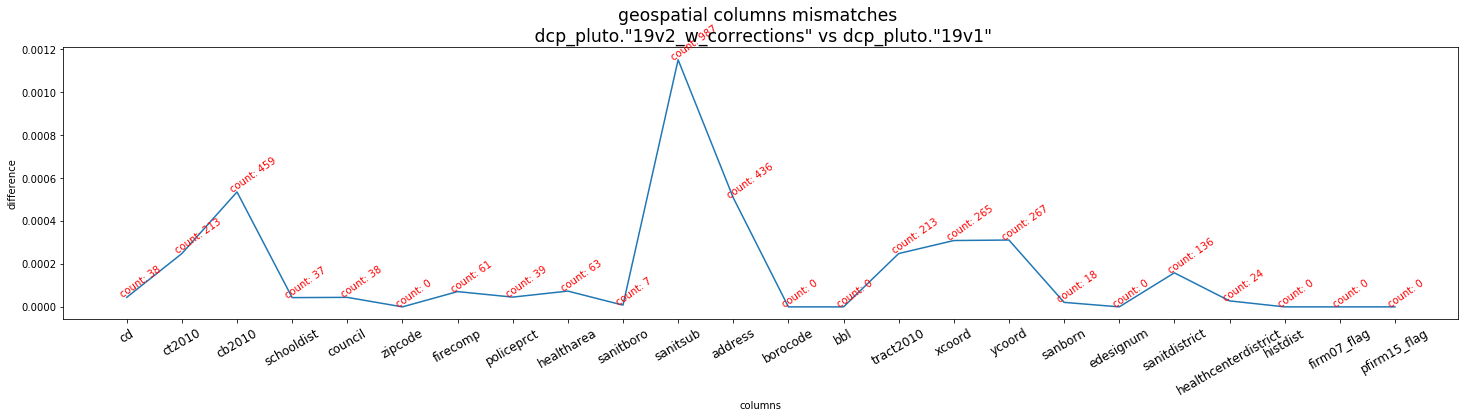

In [17]:
create_plot(df_pct, geo_columns, f'geospatial columns mismatches \n {pluto} vs {plutoprev}')

#### zoning info not changed

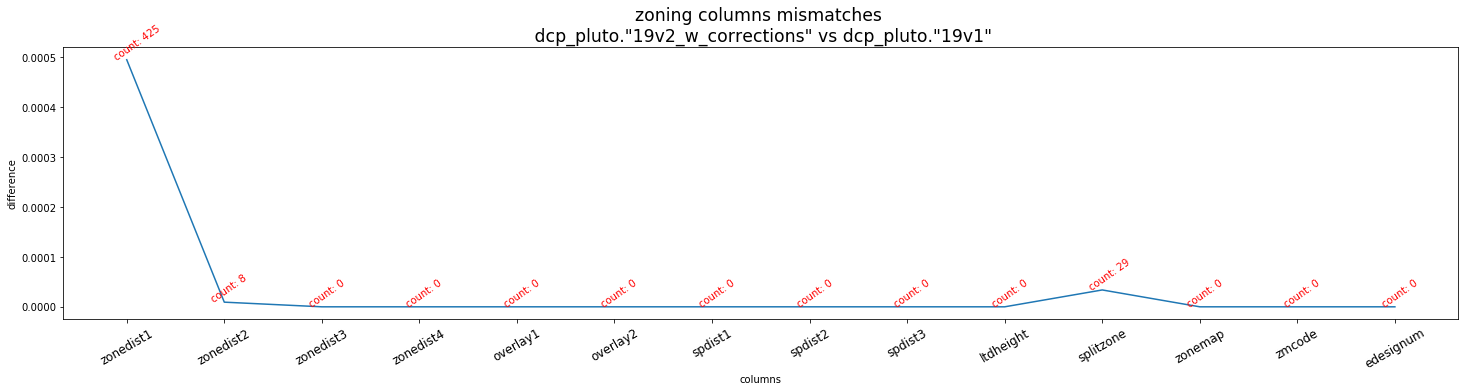

In [18]:
create_plot(df_pct, zoning_columns,  f'zoning columns mismatches \n {pluto} vs {plutoprev}')

#### not changed

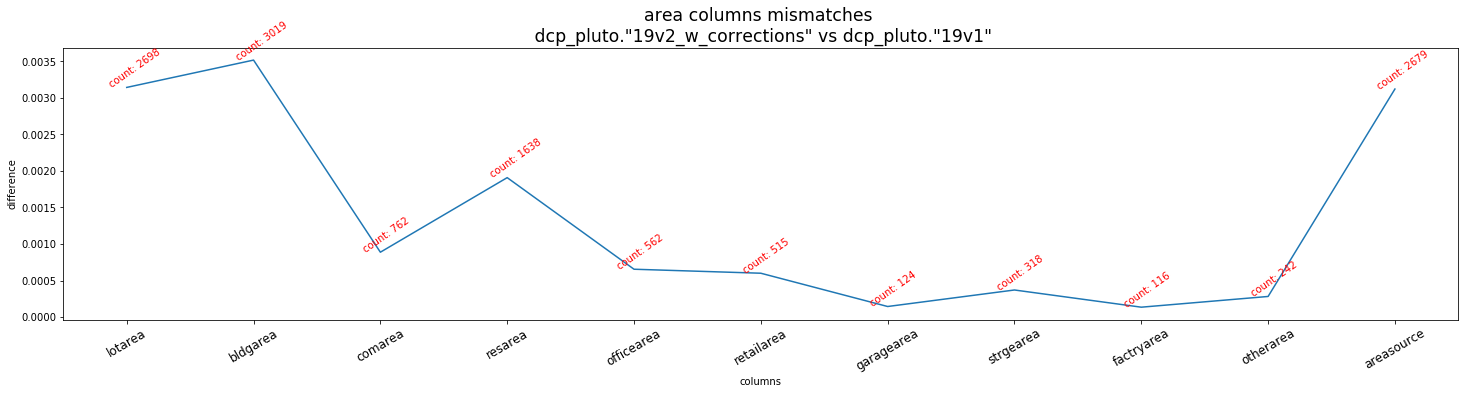

In [19]:
create_plot(df_pct, area_columns,  f'area columns mismatches \n {pluto} vs {plutoprev}')

#### huge increase for proxcode, lotttype and bsmtcode after adding cama handling script

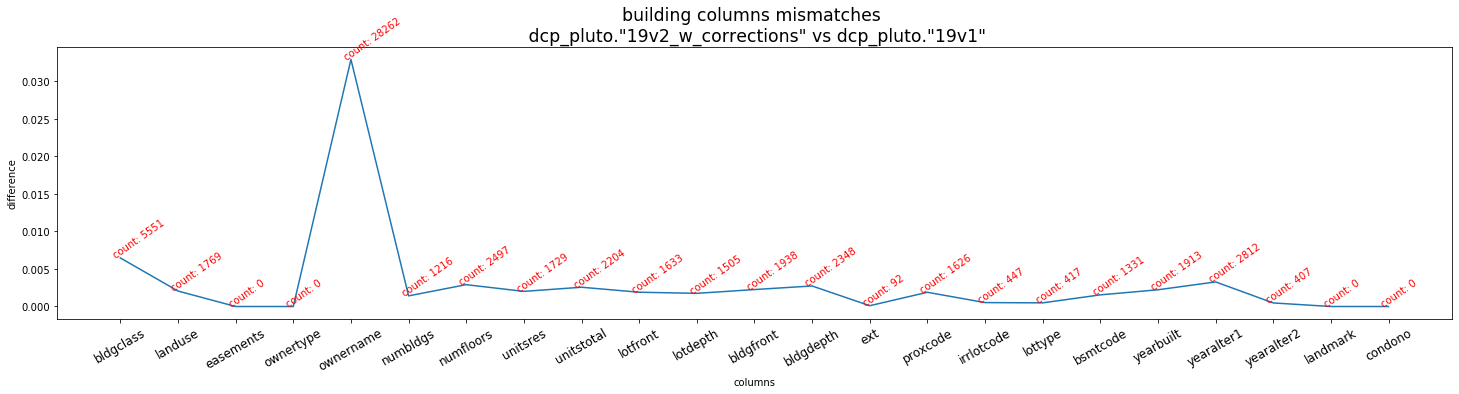

In [20]:
create_plot(df_pct, bldg_columns,  f'building columns mismatches \n {pluto} vs {plutoprev}')

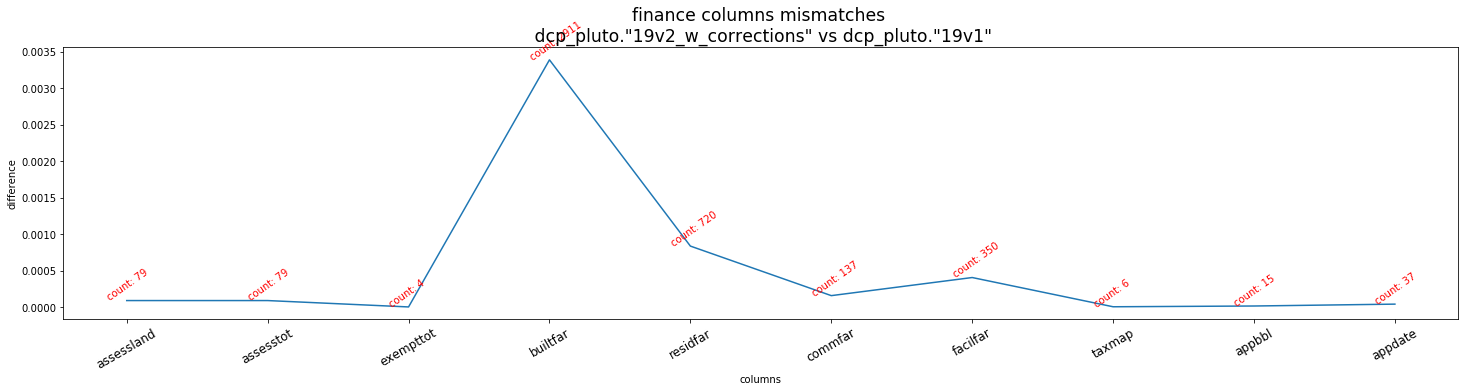

In [21]:
create_plot(df_pct, finance_columns,  f'finance columns mismatches \n {pluto} vs {plutoprev}')

#### Plutomapid is down 50%

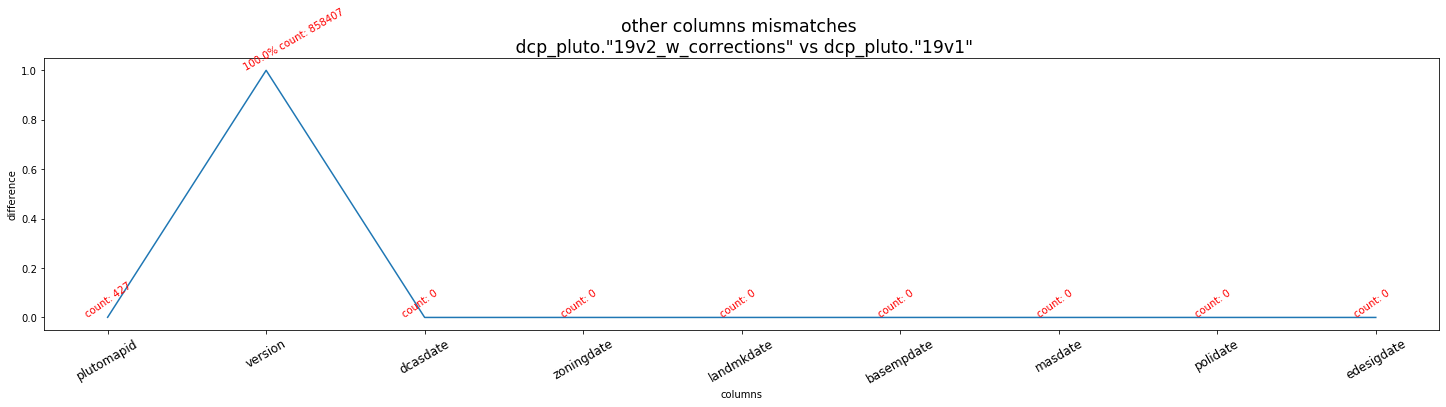

In [22]:
create_plot(df_pct, other_columns,  f'other columns mismatches \n {pluto} vs {plutoprev}')

# Condo

In [23]:
condition_condo = "WHERE right(bbl, 4) LIKE '75%%'"
sql2 = sql.format(pluto, plutoprev, condition_condo)

In [24]:
df_condo = pd.read_sql(sql=sql2, con=con)

In [25]:
df_condo

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,8475,0,0,0,0,66,15,2,0,0,1,0,0,1,66,158,1,0,0,0,0,0,0,0,0,0,0,73,3,0,0,58,29,255,24,28,14,11,6,0,0,5,844,89,150,85,97,203,201,59,63,0,24,31,26,143,79,79,4,23,1880,248,0,0,264,18,8,18,0,0,0,66,45,45,0,0,13,2,0,0,0,17,8475,4,0,0,0,0,0,0,0,0,0,0,0


In [26]:
total = df_condo.loc[0, 'total']
df_condo_pct = df_condo.loc[0, df_condo.columns != 'total']/total
df_condo_pct['total'] = total

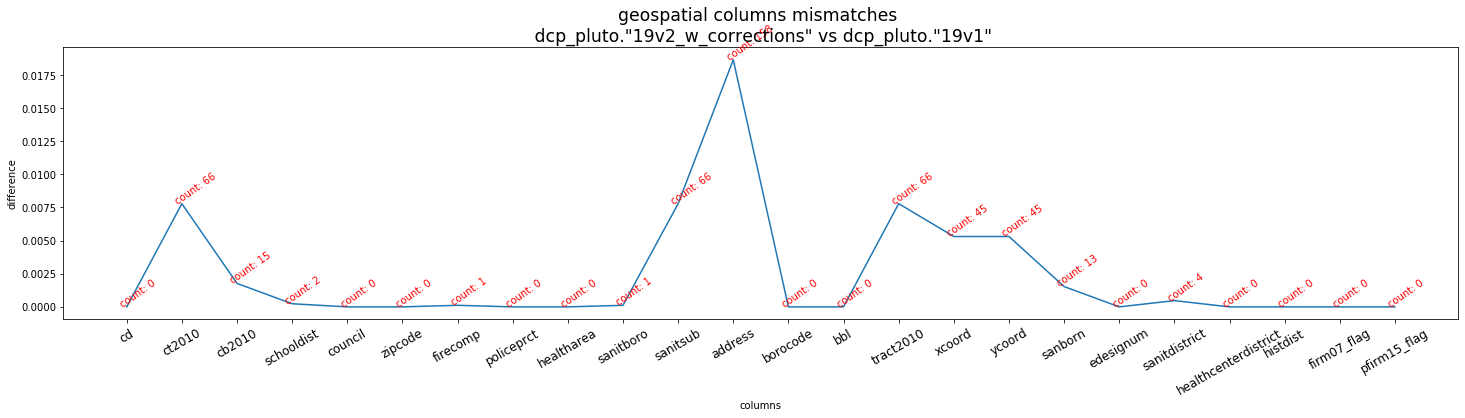

In [27]:
create_plot(df_condo_pct, geo_columns, f'geospatial columns mismatches \n {pluto} vs {plutoprev}')

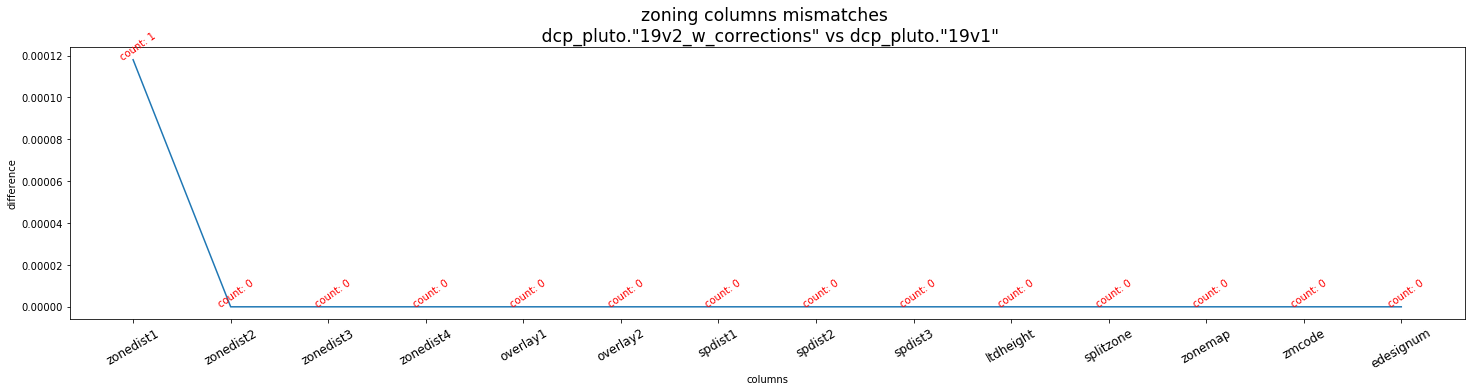

In [28]:
create_plot(df_condo_pct, zoning_columns,  f'zoning columns mismatches \n {pluto} vs {plutoprev}')

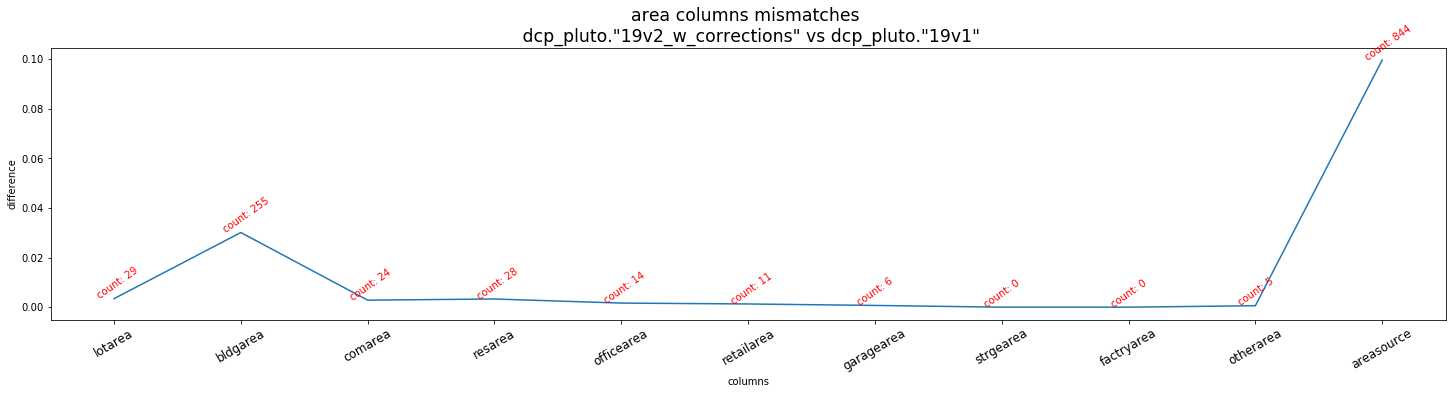

In [29]:
create_plot(df_condo_pct, area_columns,  f'area columns mismatches \n {pluto} vs {plutoprev}')

### The following shows that the create_cama_primebbl.sql script didn't correct bsmtcode and for condos and instead introduced more mismatches for noncondo lots

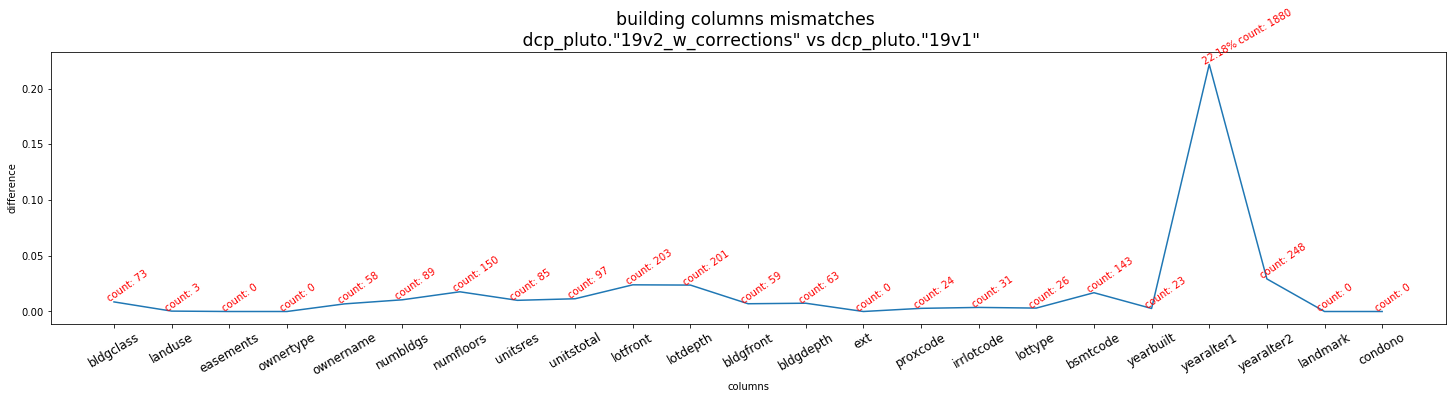

In [30]:
create_plot(df_condo_pct, bldg_columns,  f'building columns mismatches \n {pluto} vs {plutoprev}')

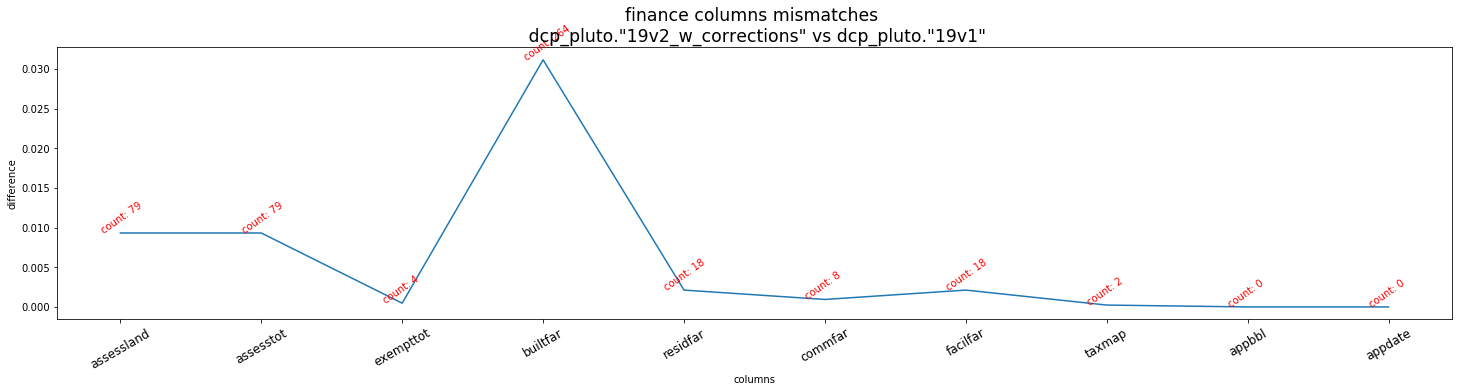

In [31]:
create_plot(df_condo_pct, finance_columns,  f'finance columns mismatches \n {pluto} vs {plutoprev}')

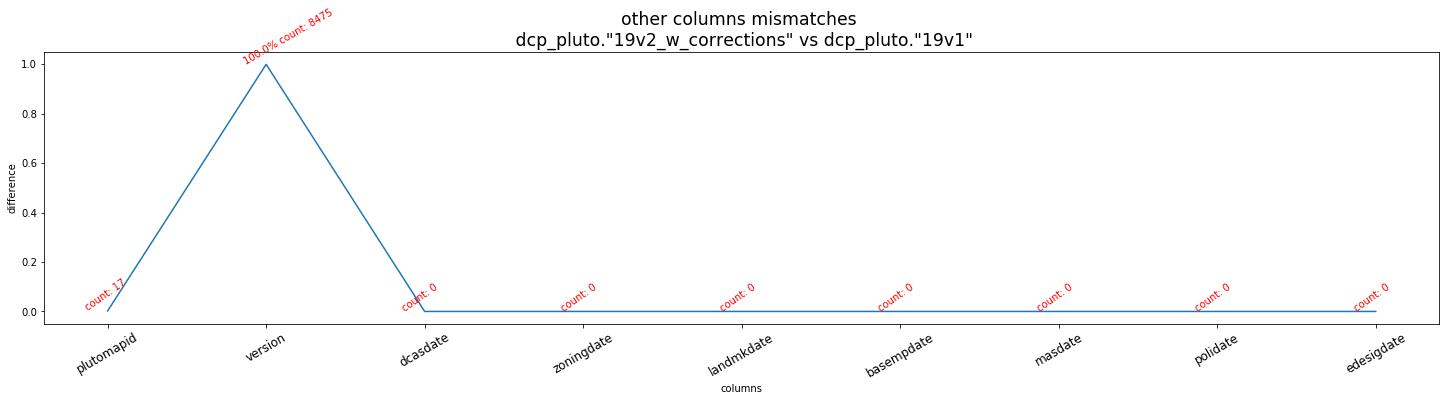

In [32]:
create_plot(df_condo_pct, other_columns,  f'other columns mismatches \n {pluto} vs {plutoprev}')